In [72]:
import numpy as np
import pywt
from scipy import signal
from biosppy.signals import ecg as ecgLib

%matplotlib inline
import matplotlib.pyplot as plt

In [793]:
ch = 1
start = 0
end = 5
fs = 360.0

In [815]:
sig = np.loadtxt('data/ecg/101.txt',dtype = int)[:,ch]
sigSamplesCount = sig.shape[0]

print "Loaded ECG Signal CH #",ch
print "Samples Count : ", sigSamplesCount
print "File Loaded"

Loaded ECG Signal CH # 1
Samples Count :  650000
File Loaded


In [816]:
rr = np.loadtxt('data/ecg.rr/101.rr.txt',dtype = int)
refRPeaks = rr[:,1]
print refRPeaks.shape[0]

1874


In [453]:
def printSecSamples(data,start,end,t):
    print "Sample Count in the " + str(end - start ) + " second(s) ECG recording ", data[(t >= start ) & (t <= end)].shape[0] 

In [452]:
time = np.linspace(0,1.* sigSamplesCount / fs, sigSamplesCount)


In [459]:
printSecSamples(sig,start,end,time);

Sample Count in the 5 second(s) ECG recording  1800


# Filtering ECG Signal

In [757]:
def sGolayFilter(sig):
    k = 3
    f = 1201
    trend = signal.savgol_filter(sig,f,k)
    fSig = sig - trend
    return fSig

In [758]:
def movingAverageFilter(sig, length):
    b = np.ones(length) * ( 1. * 1/length)
    a = 1
    fSig = signal.lfilter(b, a, sig)
    return fSig

In [804]:
#sig = movingAverageFilter(sig,10)
sig = sGolayFilter(sig)


In [456]:
def displayEcgSignal(t,sig,xMin,xMax,title):
    plt.figure( figsize = (16,3))
    plt.plot(t,sig)
    plt.xlim(xMin,xMax)
    
    ymin = np.amin(sig[(t >= xMin) & (t <= xMax)], axis = 0)
    ymax = np.amax(sig[(t >= xMin) & (t <= xMax)], axis = 0)
    
    plt.ylim(ymin - 50 ,ymax + 50)
    plt.grid()
    plt.title(title)
    plt.show()

# ECG Signal Display

In [795]:

sigSub = sig[(time >= start) & (time <= end)]
sigSubSamplesCount = sigSub.shape[0]
tSub = np.linspace(0, 1. * sigSubSamplesCount / fs, sigSubSamplesCount)


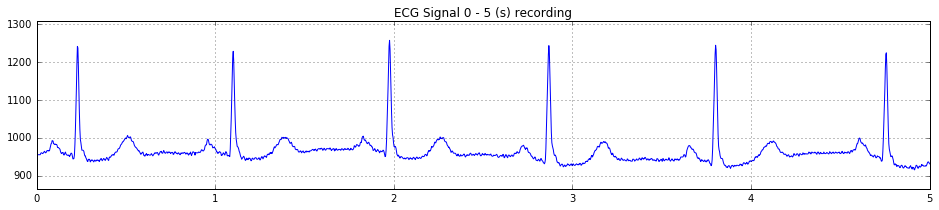

In [458]:
displayEcgSignal(tSub,sigSub,start,end,"ECG Signal " + str(start) + " - " + str(end) + " (s) recording")

# Online R Peak Detection - Buffer Size Decision

# R Peak Detectors Benchmarking

In [810]:
start = 0
#end = 300
end = sig.shape[0] / fs
sigSample = sig[(time >= start) & (time <= end)]
tSample = np.linspace(0,sigSample.shape[0]/fs, sigSample.shape[0])
print sigSample.shape[0]


650000


In [234]:
def compareSegmentation(refPeaks, testPeaks, tolerance ):
    print "---- Segmentation Comparison ----- "
    res = ecgLib.compare_segmentation(refPeaks, testPeaks, tol = tolerance, sampling_rate = fs)
    print "TP ", res['TP']
    print "Matched R Peaks Count ", len(res['match'])
    print "FP ", res['FP']
    print "Performance ", res['performance'] * 100 , "%"
    print "Accuracy ", res['acc'] * 100 , "%"
    print "Error Rate" , res['err']
    print "Mean Error (s) " , res['mean_deviation']
    print "Standard deviation of error (s) : ",res['std_deviation']
    print "Mean of the reference interbeat intervals (s)", res['mean_ref_ibi']
    print "Standard deviation of the reference interbeat intervals (s)", res['std_ref_ibi']
    print "Mean of the test interbeat intervals (s)", res['mean_test_ibi']
    print "Standard deviation of the test interbeat intervals (s)", res['std_test_ibi']
 

In [801]:
def displaySigWithPeaks(t,sig,start,end,rpeaks):
    
    plt.figure(figsize = (16,3))
    plt.plot(t,sig)
    plt.grid()
    plt.ylabel("Amplitude")
    plt.xlabel("Time (s)")

    plt.plot(t[rpeaks],sig[rpeaks],'ro')
    plt.show()
    
    

###### Method No 1

#### Process a raw ECG signal and extract relevant signal features using default parameters.

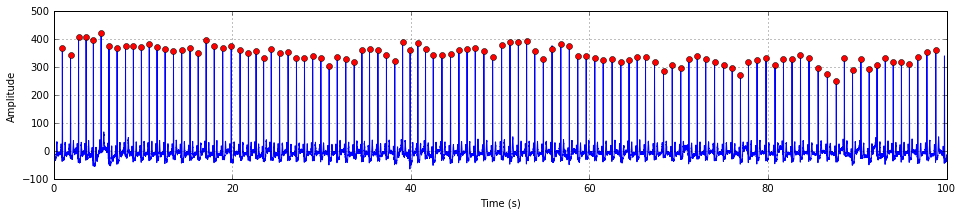

--- Method : ecg ---
R-Peaks Detected :  106
---- Segmentation Comparison ----- 
TP  12
Matched R Peaks Count  12
FP  20
Performance  0.640341515475 %
Accuracy  37.5 %
Error Rate 0.625
Mean Error (s)  0.0344907407407
Standard deviation of error (s) :  0.0121056384942
Mean of the reference interbeat intervals (s) 0.96682007745
Standard deviation of the reference interbeat intervals (s) 0.070201385878
Mean of the test interbeat intervals (s) 0.933333333333
Standard deviation of the test interbeat intervals (s) 0.0200308404192


In [553]:

res = ecgLib.ecg(signal = sigSample, sampling_rate = fs, show = False)
rpeaks = res['rpeaks']

displaySigWithPeaks(tSample,sigSample,start,end,rpeaks)

print "--- Method : ecg ---"
print "R-Peaks Detected : " ,rpeaks.shape[0]

compareSegmentation(refRPeaks,rpeaks, 0.05)



In [806]:
start = 170
end = 200
sigSample = sig[(time >= start) & (time <= end)]
tSample = np.linspace(0,sigSample.shape[0]/fs, sigSample.shape[0])
print sigSample.shape[0]

10800


[   77   370   663   947  1231  1515  1809  2045  2403  2706  2998  3283
  3560  3863  4171  4466  4765  5061  5347  5634  5918  6215  6527  6824
  7106  7393  7670  7953  8246  8539  8837  9142  9432  9710  9998 10283
 10591 10895 11191 11480 11781 12066 12351 12645 12950 13267 13562 13842
 14131 14423 14711 15012 15310 15607 15900 16183 16465 16755 17058 17359
 17657 17947 18227 18514 18796 19081 19389 19694 19989 20272 20554 20838
 21131 21424 21729 22030 22321 22603 22881 23164 23454 23757 24053 24346
 24626 24914 25198 25485 25780 26089 26387 26671 26952 27238 27536 27833
 28133 28431 28727 29015]


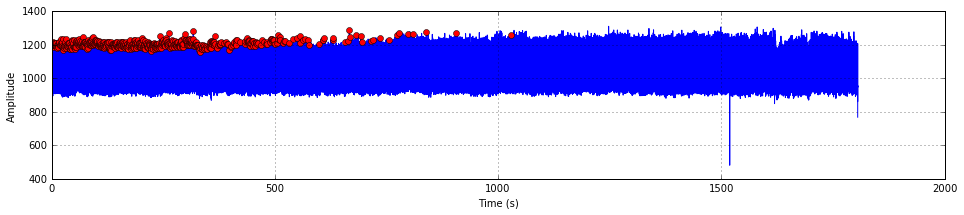

--- Method : christov Segmenter ---
R-Peaks Detected :  529
---- Segmentation Comparison ----- 
TP  64
Matched R Peaks Count  64
FP  0
Performance  3.4151547492 %
Accuracy  100.0 %
Error Rate 0.0
Mean Error (s)  0.0243923611111
Standard deviation of error (s) :  0.013764600411
Mean of the reference interbeat intervals (s) 0.96682007745
Standard deviation of the reference interbeat intervals (s) 0.070201385878
Mean of the test interbeat intervals (s) 0.823538011696
Standard deviation of the test interbeat intervals (s) 0.0273480403864


In [817]:
res = ecgLib.christov_segmenter(signal = sigSample , sampling_rate = fs)
rpeaks = res['rpeaks']
rpeaks = rpeaks[(sigSample[rpeaks] > 100)]
print rpeaks[0:100:1]
displaySigWithPeaks(tSample,sigSample,start,end,rpeaks)

print "--- Method : christov Segmenter ---"
print "R-Peaks Detected : " ,rpeaks.shape[0]

compareSegmentation(refRPeaks,rpeaks, 0.05)

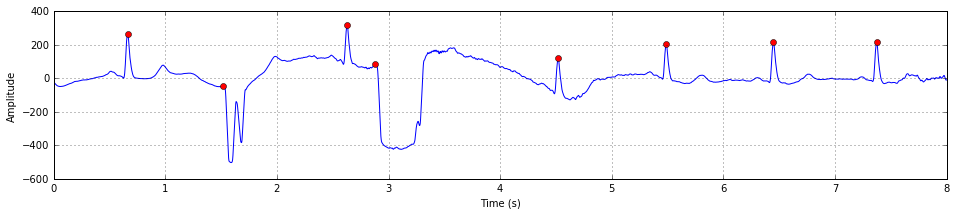

--- Method : Engzee Segmenter ---
R-Peaks Detected :  8
---- Segmentation Comparison ----- 
TP  2
Matched R Peaks Count  2
FP  3
Performance  0.106723585912 %
Accuracy  40.0 %
Error Rate 0.6
Mean Error (s)  0.0180555555556
Standard deviation of error (s) :  0.00589255650989
Mean of the reference interbeat intervals (s) 0.96682007745
Standard deviation of the reference interbeat intervals (s) 0.070201385878
Mean of the test interbeat intervals (s) nan
Standard deviation of the test interbeat intervals (s) nan


In [753]:
res = ecgLib.engzee_segmenter(signal = sigSample, sampling_rate = fs)
rpeaks = res['rpeaks']
displaySigWithPeaks(tSample,sigSample,start,end,rpeaks)

print "--- Method : Engzee Segmenter ---"
print "R-Peaks Detected : " ,rpeaks.shape[0]

compareSegmentation(refRPeaks,rpeaks, 0.05)

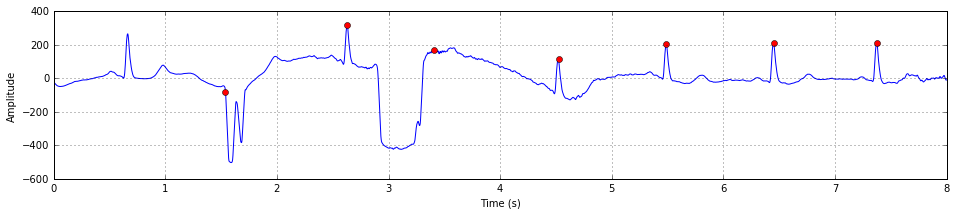

--- Method : Gamboa Segmenter  ---
R-Peaks Detected :  7
---- Segmentation Comparison ----- 
TP  0
Matched R Peaks Count  0
FP  7
Performance  0.0 %
Accuracy  0.0 %
Error Rate 1.0
Mean Error (s)  nan
Standard deviation of error (s) :  nan
Mean of the reference interbeat intervals (s) 0.96682007745
Standard deviation of the reference interbeat intervals (s) 0.070201385878
Mean of the test interbeat intervals (s) nan
Standard deviation of the test interbeat intervals (s) nan


In [754]:

res = ecgLib.gamboa_segmenter(signal = sigSample, sampling_rate = fs, tol = 0.02)
rpeaks = res['rpeaks']
displaySigWithPeaks(tSample,sigSample,start,end,rpeaks)

print "--- Method : Gamboa Segmenter  ---"
print "R-Peaks Detected : " ,rpeaks.shape[0]

compareSegmentation(refRPeaks,rpeaks, 0.0056)

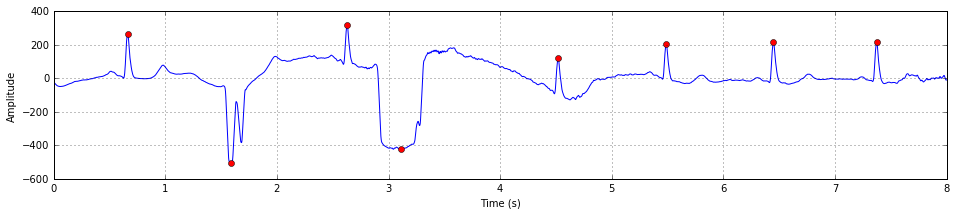

--- Method : Hamilton Segmenter  ---
R-Peaks Detected :  8
---- Segmentation Comparison ----- 
TP  1
Matched R Peaks Count  1
FP  7
Performance  0.0533617929562 %
Accuracy  12.5 %
Error Rate 0.875
Mean Error (s)  0.0222222222222
Standard deviation of error (s) :  0.0
Mean of the reference interbeat intervals (s) 0.96682007745
Standard deviation of the reference interbeat intervals (s) 0.070201385878
Mean of the test interbeat intervals (s) nan
Standard deviation of the test interbeat intervals (s) nan


In [746]:

res = ecgLib.hamilton_segmenter(signal = sigSample, sampling_rate = fs)
rpeaks = res['rpeaks']
displaySigWithPeaks(tSample,sigSample,start,end,rpeaks)

print "--- Method : Hamilton Segmenter  ---"
print "R-Peaks Detected : " ,rpeaks.shape[0]

compareSegmentation(refRPeaks,rpeaks, 0.05)

In [760]:
start = 317
end = 325
#end = sig.shape[0] / fs
sigSample = sig[(time >= start) & (time <= end)]
tSample = np.linspace(0,sigSample.shape[0]/fs, sigSample.shape[0])
print sigSample.shape[0]

2880


-141.144770991
498.268357468


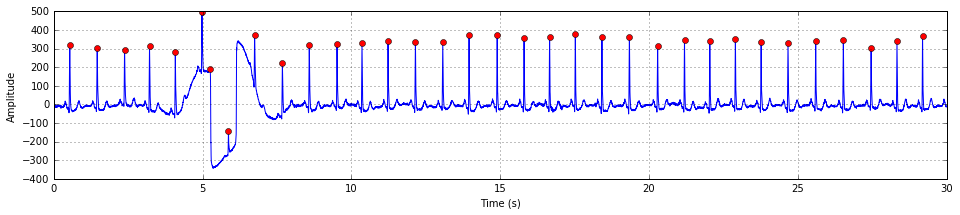

--- Method : SSF Segmenter  ---
R-Peaks Detected :  34
---- Segmentation Comparison ----- 
TP  0
Matched R Peaks Count  0
FP  34
Performance  0.0 %
Accuracy  0.0 %
Error Rate 1.0
Mean Error (s)  nan
Standard deviation of error (s) :  nan
Mean of the reference interbeat intervals (s) 0.96682007745
Standard deviation of the reference interbeat intervals (s) 0.070201385878
Mean of the test interbeat intervals (s) nan
Standard deviation of the test interbeat intervals (s) nan


In [807]:

res = ecgLib.ssf_segmenter(signal = sigSample, sampling_rate = fs, threshold = 220, before = 0.07, after = 0.07)
                          
rpeaks = res['rpeaks']
#print rpeaks[0:100:1]
print np.amin(sigSample[rpeaks])
print np.amax(sigSample[rpeaks])
displaySigWithPeaks(tSample,sigSample,start,end,rpeaks)

print "--- Method : SSF Segmenter  ---"
print "R-Peaks Detected : " ,rpeaks.shape[0]

compareSegmentation(refRPeaks,rpeaks, 0.05)


### 

---------------
Window No  1


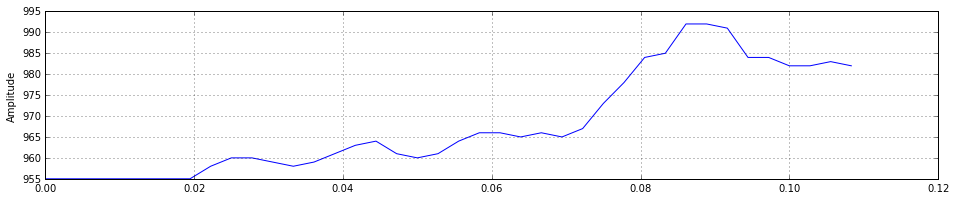

Window Length (T)  40
Window Length (ECG)  40
Time Initial value:  0.0
Time End value :  0.1083335
R-Peaks : []
---------------
Window No  2


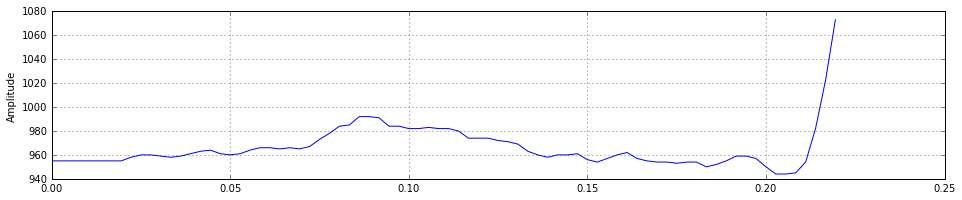

Window Length (T)  80
Window Length (ECG)  80
Time Initial value:  0.0
Time End value :  0.219444782052
R-Peaks : []
---------------
Window No  3


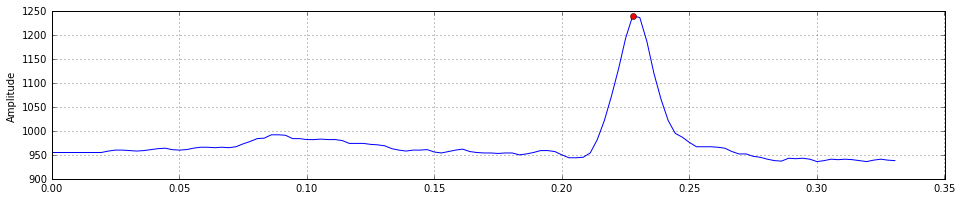

Window Length (T)  120
Window Length (ECG)  120
Time Initial value:  0.0
Time End value :  0.330556064103
R-Peaks : [82]
---------------
Window No  4


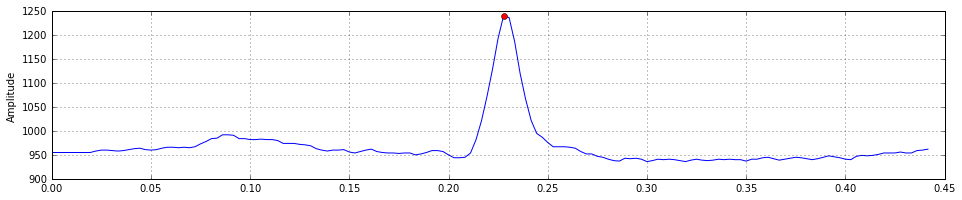

Window Length (T)  160
Window Length (ECG)  160
Time Initial value:  0.0
Time End value :  0.441667346155
R-Peaks : [82]
---------------
Window No  5


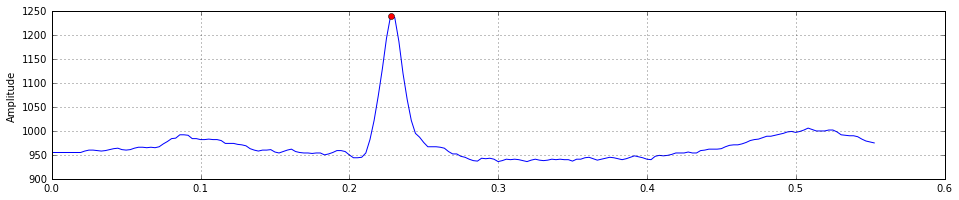

Window Length (T)  200
Window Length (ECG)  200
Time Initial value:  0.0
Time End value :  0.552778628206
R-Peaks : [82]
---------------
Window No  6


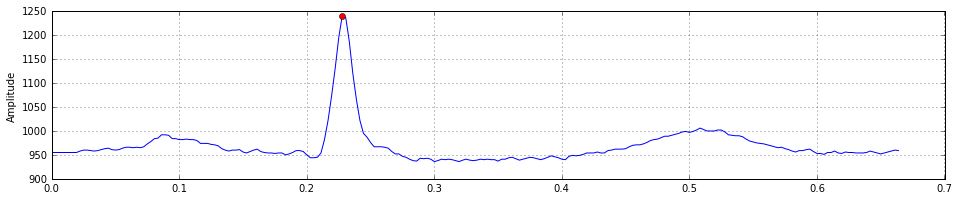

Window Length (T)  240
Window Length (ECG)  240
Time Initial value:  0.0
Time End value :  0.663889910258
R-Peaks : [82]
---------------
Window No  7


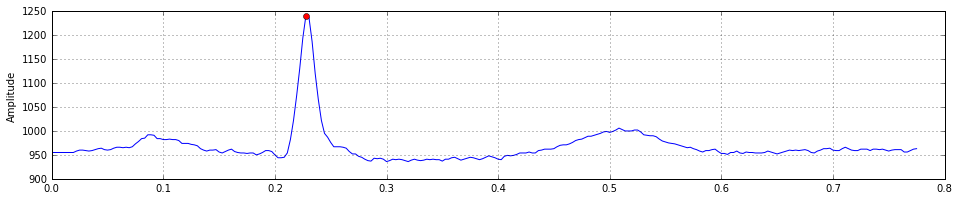

Window Length (T)  280
Window Length (ECG)  280
Time Initial value:  0.0
Time End value :  0.77500119231
R-Peaks : [82]
---------------
Window No  8


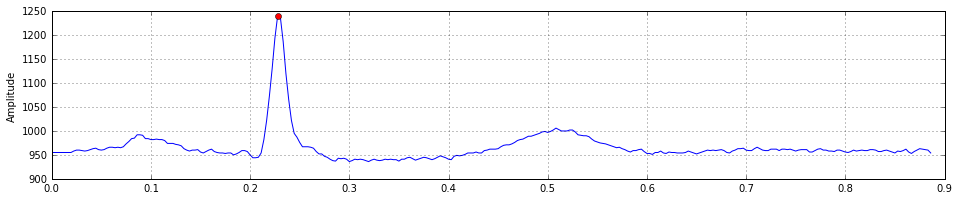

Window Length (T)  320
Window Length (ECG)  320
Time Initial value:  0.0
Time End value :  0.886112474361
R-Peaks : [82]
---------------
Window No  9


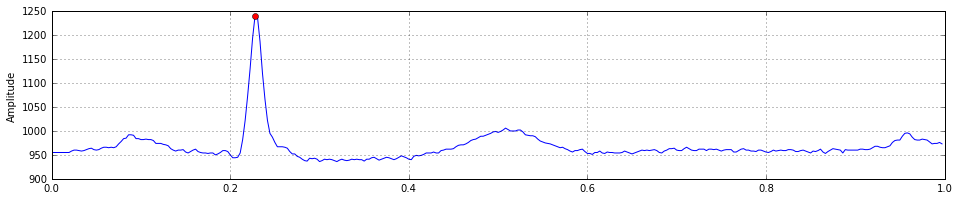

Window Length (T)  360
Window Length (ECG)  360
Time Initial value:  0.0
Time End value :  0.997223756413
R-Peaks : [82]
---------------
Window No  10


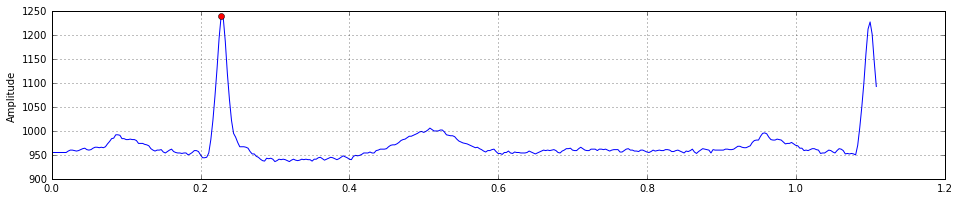

Window Length (T)  400
Window Length (ECG)  400
Time Initial value:  0.0
Time End value :  1.10833503846
R-Peaks : [82]
---------------
Window No  11


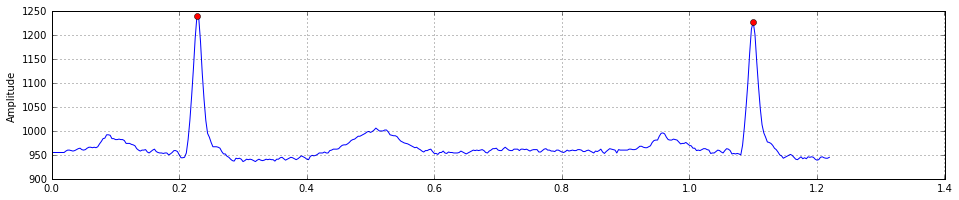

Window Length (T)  440
Window Length (ECG)  440
Time Initial value:  0.0
Time End value :  1.21944632052
R-Peaks : [ 82 396]
---------------
Window No  12


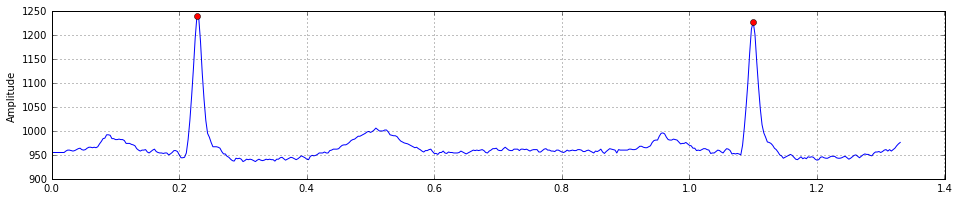

Window Length (T)  480
Window Length (ECG)  480
Time Initial value:  0.0
Time End value :  1.33055760257
R-Peaks : [ 82 396]
---------------
Window No  13


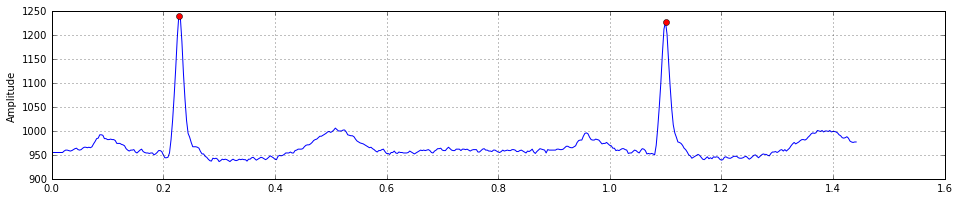

Window Length (T)  520
Window Length (ECG)  520
Time Initial value:  0.0
Time End value :  1.44166888462
R-Peaks : [ 82 396]
---------------
Window No  14


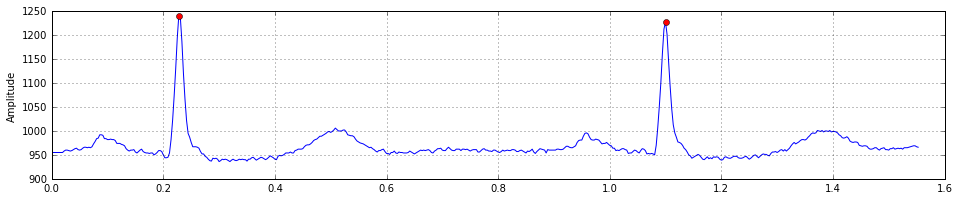

Window Length (T)  560
Window Length (ECG)  560
Time Initial value:  0.0
Time End value :  1.55278016667
R-Peaks : [ 82 396]
---------------
Window No  15


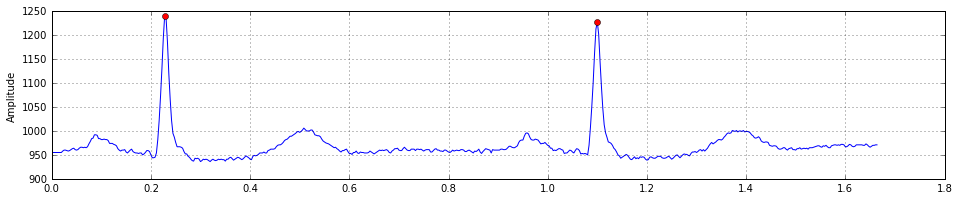

Window Length (T)  600
Window Length (ECG)  600
Time Initial value:  0.0
Time End value :  1.66389144872
R-Peaks : [ 82 396]
---------------
Window No  16


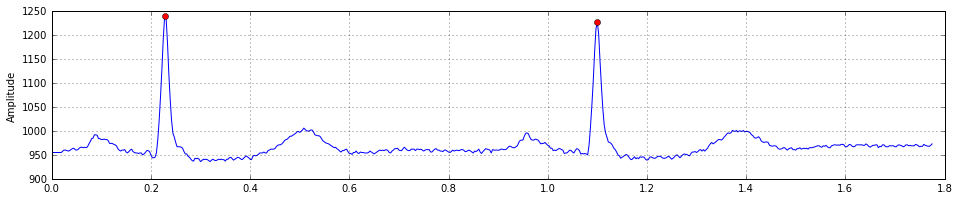

Window Length (T)  640
Window Length (ECG)  640
Time Initial value:  0.0
Time End value :  1.77500273077
R-Peaks : [ 82 396]
---------------
Window No  17


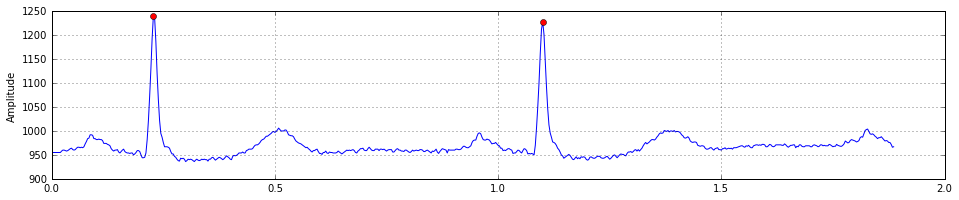

Window Length (T)  680
Window Length (ECG)  680
Time Initial value:  0.0
Time End value :  1.88611401282
R-Peaks : [ 82 396]
---------------
Window No  18


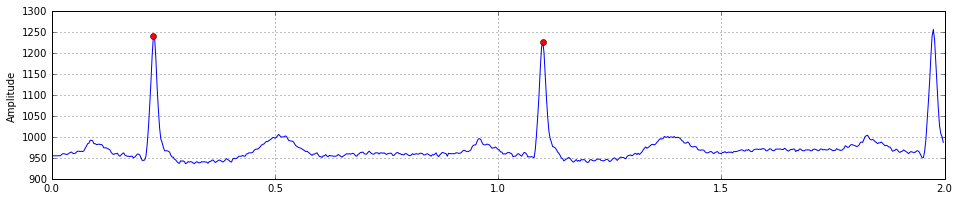

Window Length (T)  720
Window Length (ECG)  720
Time Initial value:  0.0
Time End value :  1.99722529488
R-Peaks : [ 82 396]
---------------
Window No  19


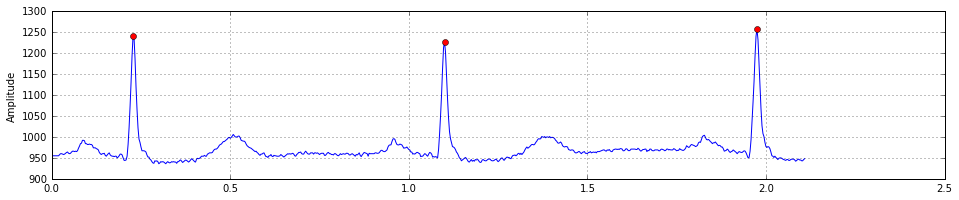

Window Length (T)  760
Window Length (ECG)  760
Time Initial value:  0.0
Time End value :  2.10833657693
R-Peaks : [ 82 396 711]
---------------
Window No  20


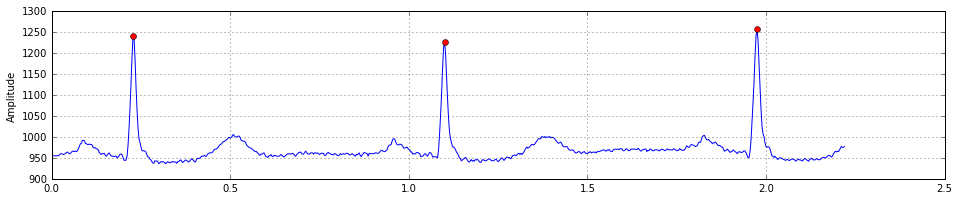

Window Length (T)  800
Window Length (ECG)  800
Time Initial value:  0.0
Time End value :  2.21944785898
R-Peaks : [ 82 396 711]
---------------
Window No  21


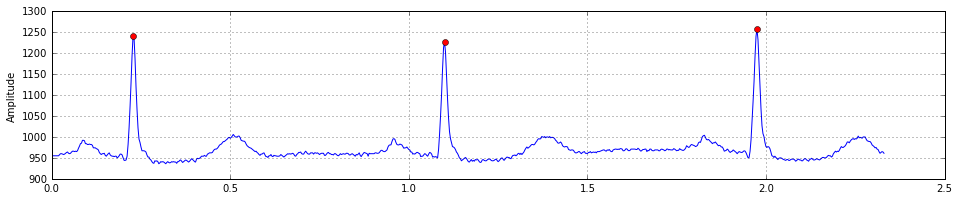

Window Length (T)  840
Window Length (ECG)  840
Time Initial value:  0.0
Time End value :  2.33055914103
R-Peaks : [ 82 396 711]
---------------
Window No  22


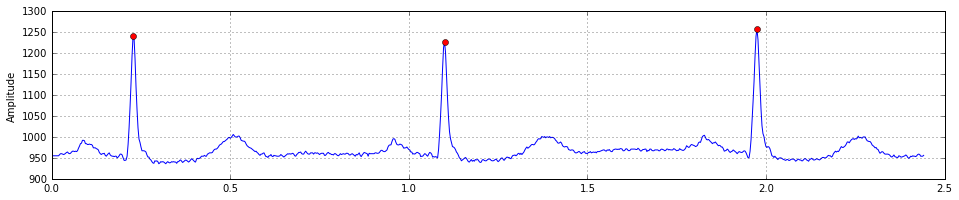

Window Length (T)  880
Window Length (ECG)  880
Time Initial value:  0.0
Time End value :  2.44167042308
R-Peaks : [ 82 396 711]
---------------
Window No  23


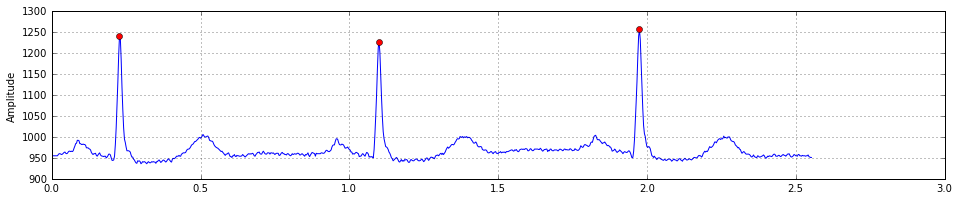

Window Length (T)  920
Window Length (ECG)  920
Time Initial value:  0.0
Time End value :  2.55278170513
R-Peaks : [ 82 396 711]
---------------
Window No  24


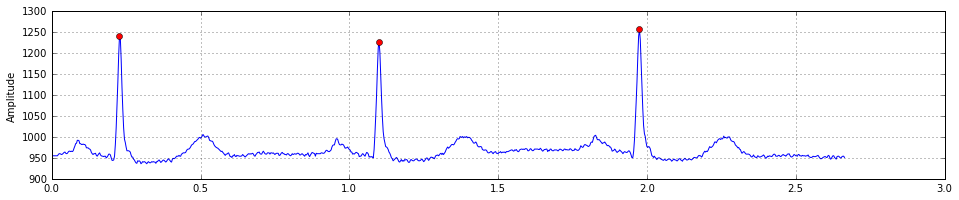

Window Length (T)  960
Window Length (ECG)  960
Time Initial value:  0.0
Time End value :  2.66389298719
R-Peaks : [ 82 396 711]
---------------
Window No  25


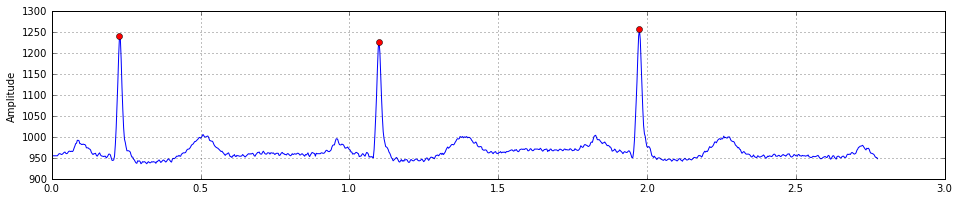

Window Length (T)  1000
Window Length (ECG)  1000
Time Initial value:  0.0
Time End value :  2.77500426924
R-Peaks : [ 82 396 711]
---------------
Window No  26


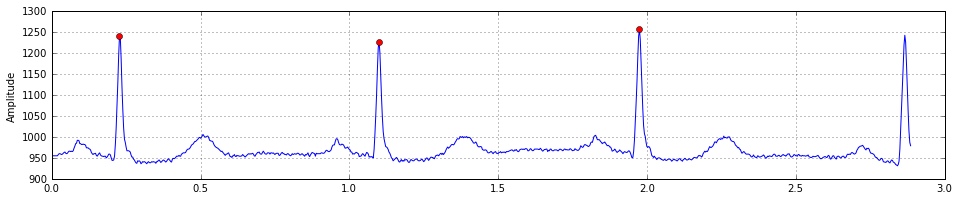

Window Length (T)  1040
Window Length (ECG)  1040
Time Initial value:  0.0
Time End value :  2.88611555129
R-Peaks : [ 82 396 711]
---------------
Window No  27


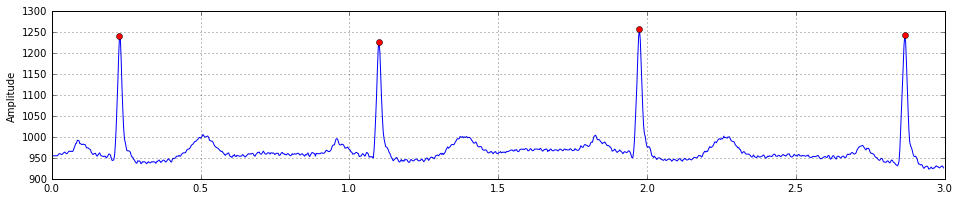

Window Length (T)  1080
Window Length (ECG)  1080
Time Initial value:  0.0
Time End value :  2.99722683334
R-Peaks : [  82  396  711 1032]
---------------
Window No  28


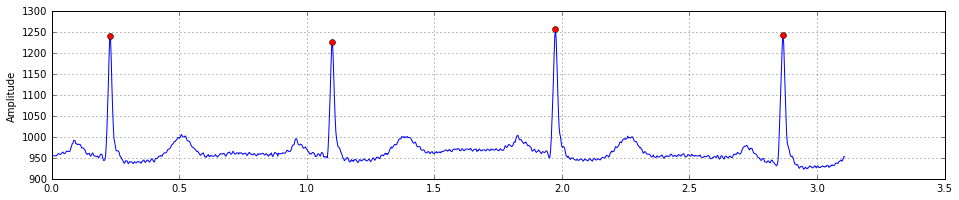

Window Length (T)  1120
Window Length (ECG)  1120
Time Initial value:  0.0
Time End value :  3.10833811539
R-Peaks : [  82  396  711 1032]
---------------
Window No  29


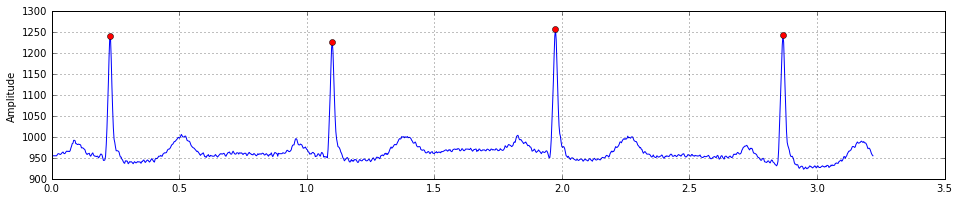

Window Length (T)  1160
Window Length (ECG)  1160
Time Initial value:  0.0
Time End value :  3.21944939744
R-Peaks : [  82  396  711 1032]
---------------
Window No  30


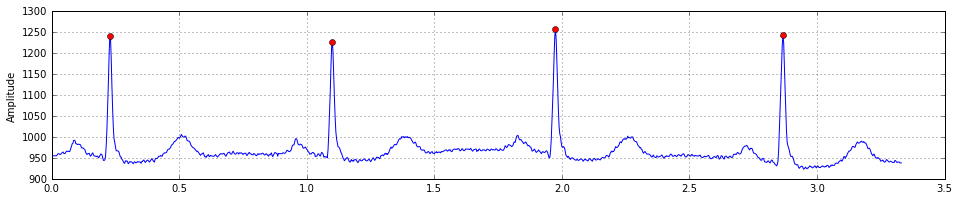

Window Length (T)  1200
Window Length (ECG)  1200
Time Initial value:  0.0
Time End value :  3.3305606795
R-Peaks : [  82  396  711 1032]
---------------
Window No  31


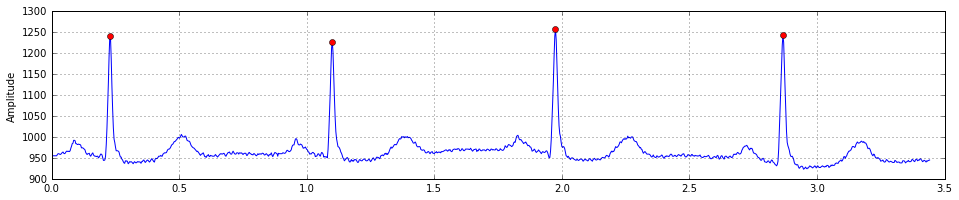

Window Length (T)  1240
Window Length (ECG)  1240
Time Initial value:  0.0
Time End value :  3.44167196155
R-Peaks : [  82  396  711 1032]
---------------
Window No  32


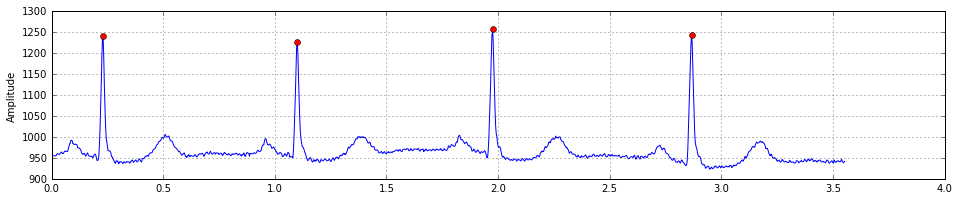

Window Length (T)  1280
Window Length (ECG)  1280
Time Initial value:  0.0
Time End value :  3.5527832436
R-Peaks : [  82  396  711 1032]
---------------
Window No  33


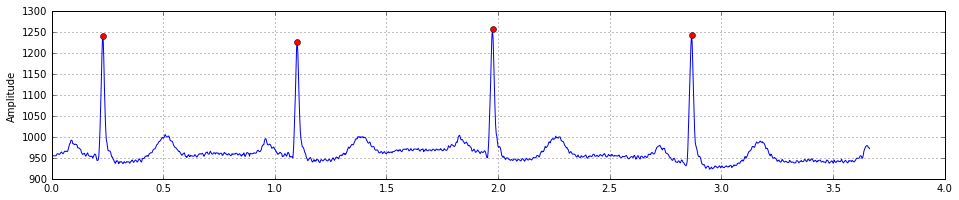

Window Length (T)  1320
Window Length (ECG)  1320
Time Initial value:  0.0
Time End value :  3.66389452565
R-Peaks : [  82  396  711 1032]
---------------
Window No  34


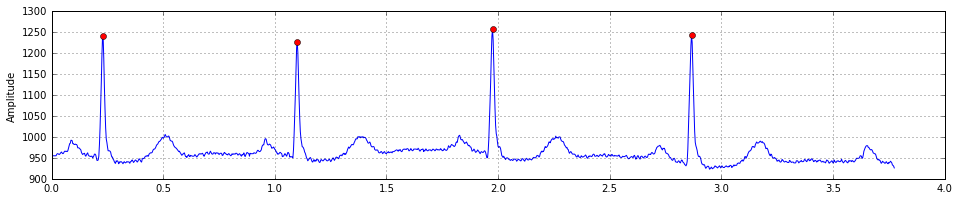

Window Length (T)  1360
Window Length (ECG)  1360
Time Initial value:  0.0
Time End value :  3.7750058077
R-Peaks : [  82  396  711 1032]
---------------
Window No  35


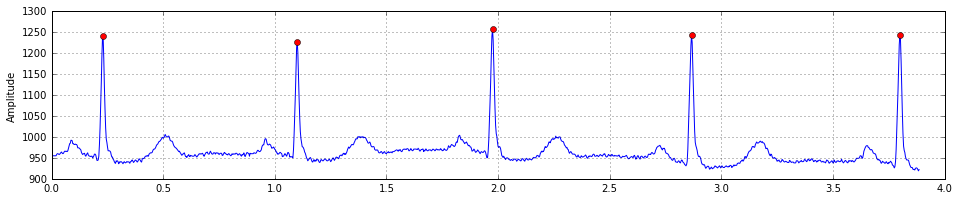

Window Length (T)  1400
Window Length (ECG)  1400
Time Initial value:  0.0
Time End value :  3.88611708975
R-Peaks : [  82  396  711 1032 1368]
---------------
Window No  36


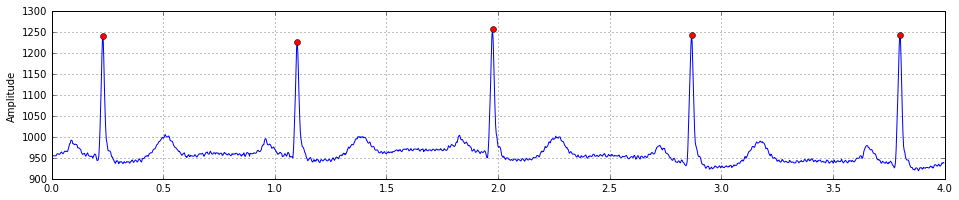

Window Length (T)  1440
Window Length (ECG)  1440
Time Initial value:  0.0
Time End value :  3.9972283718
R-Peaks : [  82  396  711 1032 1368]
---------------
Window No  37


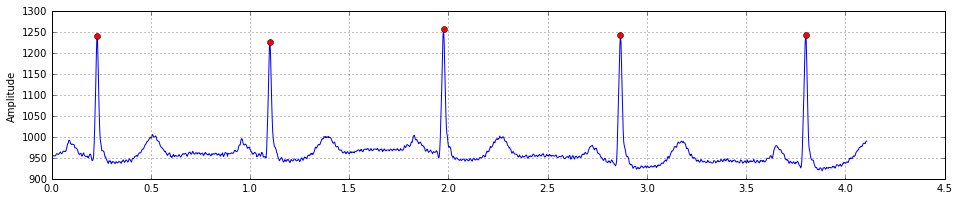

Window Length (T)  1480
Window Length (ECG)  1480
Time Initial value:  0.0
Time End value :  4.10833965386
R-Peaks : [  82  396  711 1032 1368]
---------------
Window No  38


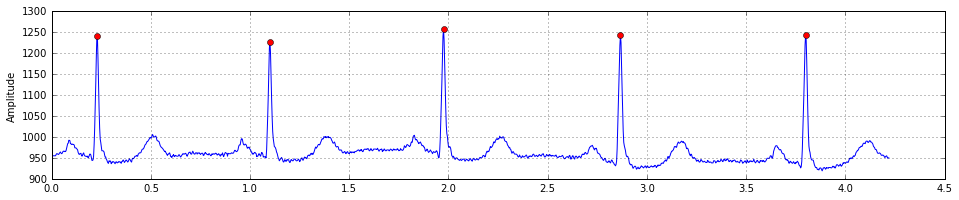

Window Length (T)  1520
Window Length (ECG)  1520
Time Initial value:  0.0
Time End value :  4.21945093591
R-Peaks : [  82  396  711 1032 1368]
---------------
Window No  39


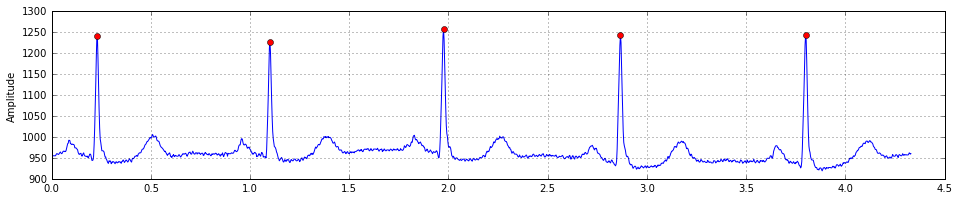

Window Length (T)  1560
Window Length (ECG)  1560
Time Initial value:  0.0
Time End value :  4.33056221796
R-Peaks : [  82  396  711 1032 1368]
---------------
Window No  40


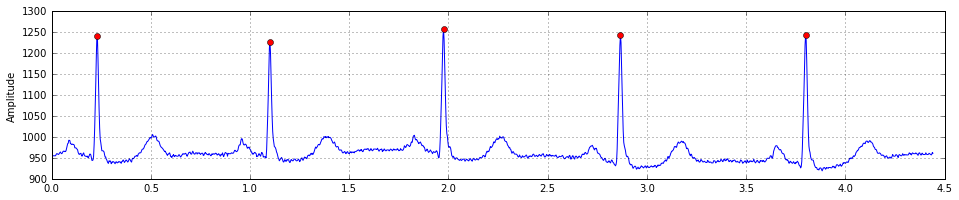

Window Length (T)  1600
Window Length (ECG)  1600
Time Initial value:  0.0
Time End value :  4.44167350001
R-Peaks : [  82  396  711 1032 1368]
---------------
Window No  41


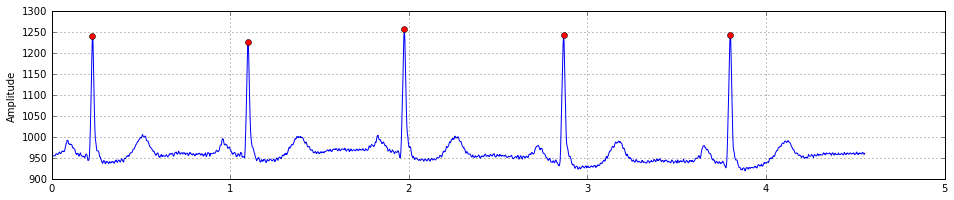

Window Length (T)  1640
Window Length (ECG)  1640
Time Initial value:  0.0
Time End value :  4.55278478206
R-Peaks : [  82  396  711 1032 1368]
---------------
Window No  42


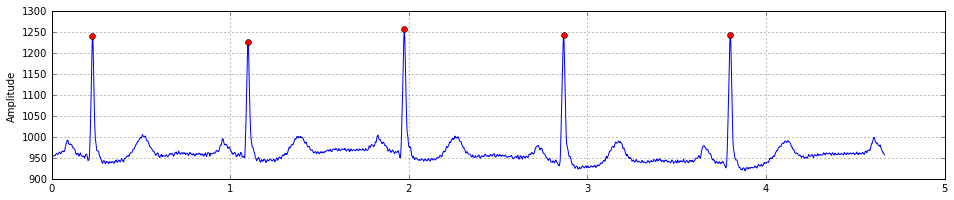

Window Length (T)  1680
Window Length (ECG)  1680
Time Initial value:  0.0
Time End value :  4.66389606411
R-Peaks : [  82  396  711 1032 1368]
---------------
Window No  43


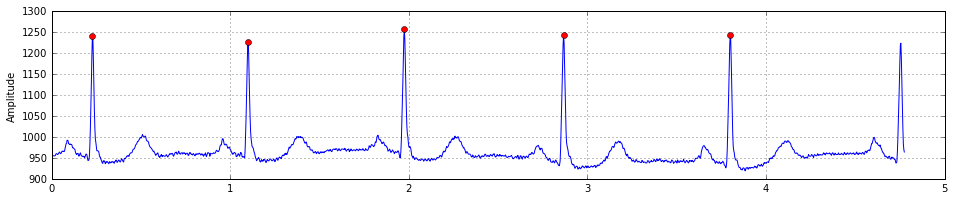

Window Length (T)  1720
Window Length (ECG)  1720
Time Initial value:  0.0
Time End value :  4.77500734617
R-Peaks : [  82  396  711 1032 1368]
---------------
Window No  44


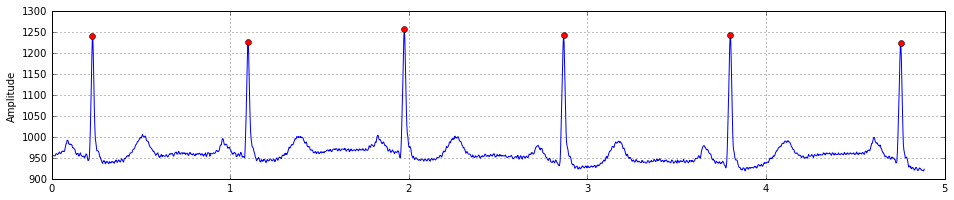

Window Length (T)  1760
Window Length (ECG)  1760
Time Initial value:  0.0
Time End value :  4.88611862822
R-Peaks : [  82  396  711 1032 1368 1712]
---------------
Window No  45


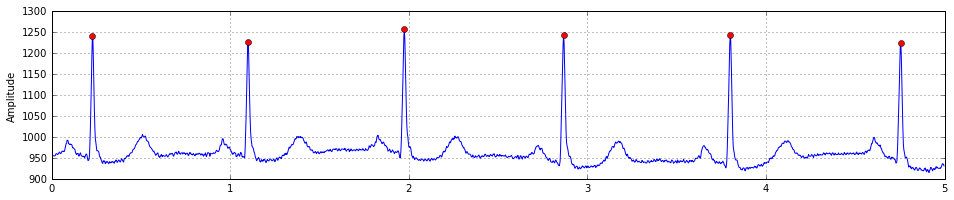

Window Length (T)  1800
Window Length (ECG)  1800
Time Initial value:  0.0
Time End value :  4.99722991027
R-Peaks : [  82  396  711 1032 1368 1712]
---------------
Window No  46


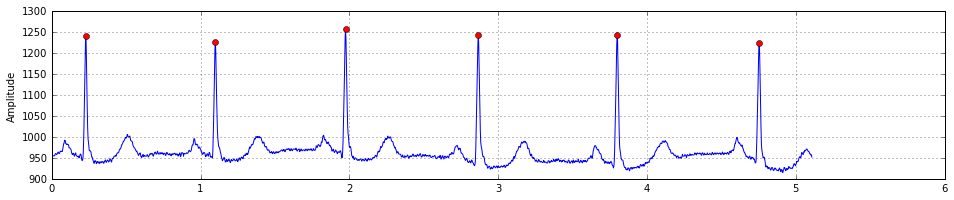

Window Length (T)  1840
Window Length (ECG)  1840
Time Initial value:  0.0
Time End value :  5.10834119232
R-Peaks : [  82  396  711 1032 1368 1712]
---------------
Window No  47


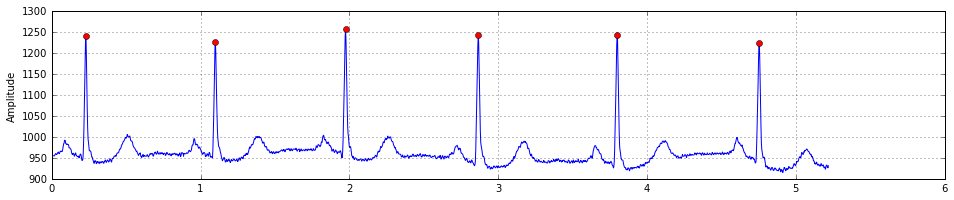

Window Length (T)  1880
Window Length (ECG)  1880
Time Initial value:  0.0
Time End value :  5.21945247437
R-Peaks : [  82  396  711 1032 1368 1712]
---------------
Window No  48


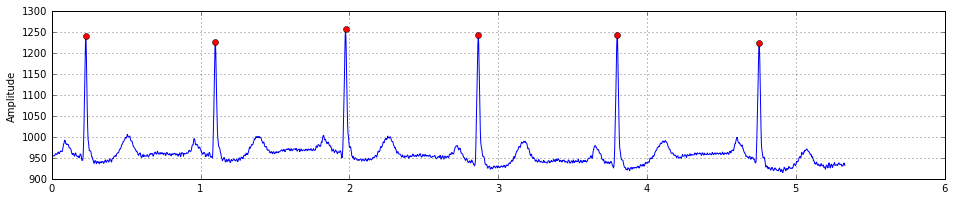

Window Length (T)  1920
Window Length (ECG)  1920
Time Initial value:  0.0
Time End value :  5.33056375642
R-Peaks : [  82  396  711 1032 1368 1712]
---------------
Window No  49


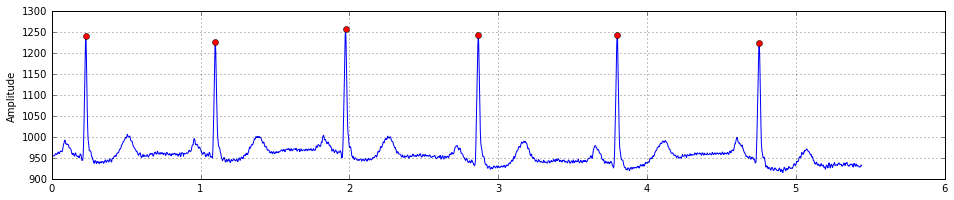

Window Length (T)  1960
Window Length (ECG)  1960
Time Initial value:  0.0
Time End value :  5.44167503847
R-Peaks : [  82  396  711 1032 1368 1712]
---------------
Window No  50


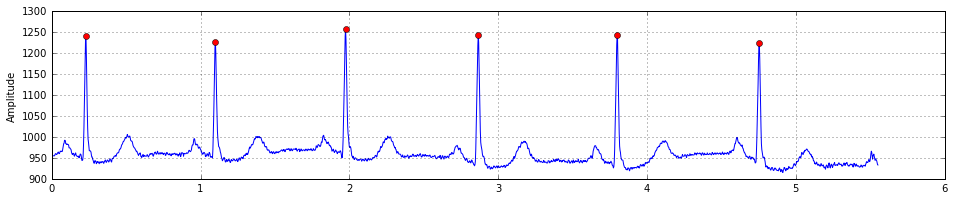

Window Length (T)  2000
Window Length (ECG)  2000
Time Initial value:  0.0
Time End value :  5.55278632053
R-Peaks : [  82  396  711 1032 1368 1712]


In [821]:
def displayEcgWindow(st, end, time, sig):

    plt.figure(figsize = (16,3))
    plt.plot(time,sig)
    plt.grid()
    plt.ylabel("Amplitude")
    
    result = ecgLib.ssf_segmenter(signal = sig, sampling_rate = fs, threshold = 200, before = 0.7, after = 0.05)
    rpeaks =  result['rpeaks']
 
    plt.plot(time[rpeaks],sig[rpeaks],'ro')
    
    plt.show()
    
    print "Window Length (T) " ,time.shape[0]
    print "Window Length (ECG) " ,sig.shape[0]

    print "Time Initial value: ", time[0]
    print "Time End value : " , time[-1]
    print "R-Peaks :" , rpeaks
    
    
stepSize = 40
winStart = 0
winEnd = stepSize
for i in range(50):
    print "---------------"
    print "Window No ", (i + 1)
    
    tWin = time[winStart:winEnd:1]
    sigWin = sig[winStart:winEnd:1]
    
    displayEcgWindow(winStart,winEnd,tWin,sigWin)
    winEnd += stepSize